# 유방암 여부를 진단하기

sklearn의 예제 데이터 셋인 breast_cancer를 학습하는 모델을 만들어 보자.

## 필요한 모듈 Import하기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

학습시킬 모델들도 import한다

In [2]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 데이터 준비하기
sklearn에서 wine data set을 로드한다.

In [3]:
breast_cancer = load_breast_cancer()

## 데이터 이해하기

로드된 데이터를 분석해보자.  
우선 데이터 feature와 target을 확인해보자.

In [4]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 데이터 Describe 해 보기
우선 무슨 데이터 셋인지 설명부터 보자.

In [5]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

구글 번역 결과

`특징은 유방 종괴의 미세 바늘 흡인물(FNA)의 디지털화된 이미지에서 계산됩니다.  
그들은 이미지에 존재하는 세포 핵의 특성을 설명합니다.`

유방의 종양 이미지에 존재하는 세포 핵의 특성들을 나타낸다고 한다.
간단하게 특성들을 보고 종양이 악성인지 양성인지 판별해야한다.

우선 특성들부터 살펴보자.

In [6]:
print(f"특성의 개수 : {len(breast_cancer.feature_names)}")
breast_cancer.feature_names

특성의 개수 : 30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Target Names 출력해 보기

In [7]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

라벨은

악성(malignant) : 0  
양성(benign) : 1

이전 데이터와는 다르게 정렬되어 있지않다.

유방암 유무를 판단하는 거면 악성이 1이어여 하는거 아닌가 싶다.
일단 넘어가자.

### 데이터 구성 확인하기
데이터를 지정하기 전에 pandas를 이용해서 데이터의 구성을 시각화해보자.

In [9]:
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 결측치
결측치는 따로 없다.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 이상치

In [12]:
df['label'] = breast_cancer.target
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


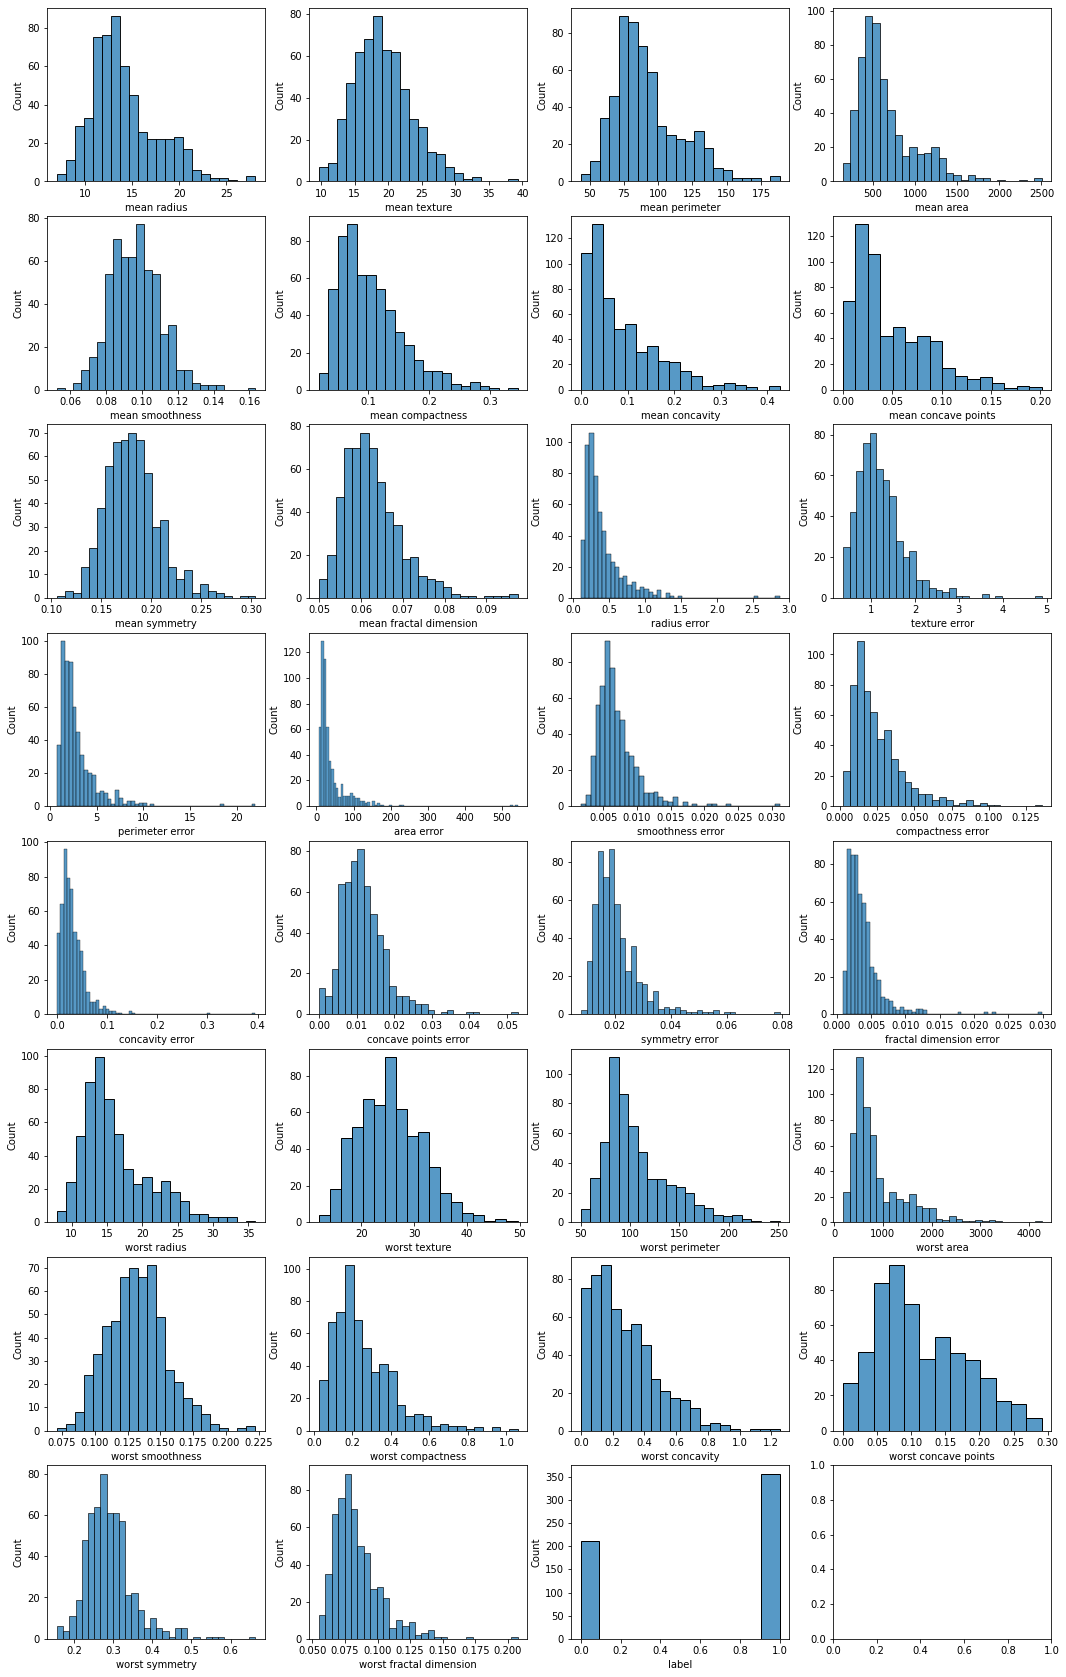

In [13]:
figure, axs_2d = plt.subplots(nrows=8, ncols=4)
figure.set_size_inches(18, 30)  # 그래프 크기를 조정

for x, ax in zip(df.columns, np.ravel(axs_2d)):
    sns.histplot(data=df, x=x, ax=ax)

concavity error, area error등 몇 개의 큰 값이 존재한다.

이게 이상치인지 z-score를 이용해서 확인해보자.

### $Z - score = \frac{x_i - \mu}{\sigma}$

In [14]:
z_score = abs(df - df.mean())/df.std()
z_score.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.780888,0.787012,0.783267,0.748715,0.793578,0.778320,0.784697,0.810760,0.771341,0.751584,...,0.799157,0.787602,0.744488,0.786408,0.760687,0.789455,0.836668,0.725278,0.742454,0.966135
std,0.623811,0.616054,0.620817,0.662147,0.607556,0.627018,0.619004,0.584389,0.635599,0.658883,...,0.600186,0.615297,0.666905,0.616826,0.648334,0.612913,0.546584,0.687783,0.669172,0.254833
min,0.004907,0.000082,0.011563,0.003441,0.002113,0.004563,0.004758,0.004145,0.001391,0.001755,...,0.006960,0.001154,0.000381,0.001375,0.003400,0.004738,0.001427,0.000395,0.005305,0.769931
25%,0.305697,0.316121,0.320550,0.317438,0.322787,0.355199,0.382599,0.448399,0.319609,0.280100,...,0.341220,0.350605,0.344218,0.318345,0.341085,0.377178,0.437322,0.266304,0.307519,0.769931
50%,0.640539,0.646438,0.648959,0.617449,0.685412,0.660654,0.700445,0.727244,0.633315,0.590960,...,0.709827,0.658617,0.611948,0.646825,0.639616,0.659504,0.752084,0.555632,0.602162,0.769931
75%,1.114426,1.104467,1.107826,0.975207,1.126250,1.030073,0.967003,1.011030,1.078338,1.027198,...,1.180755,1.075478,0.902041,1.102318,1.001516,1.073022,1.178358,0.971037,0.994071,1.296535
max,3.967796,4.647799,3.972634,5.245913,4.766717,4.564409,4.239858,3.924477,4.480808,4.906602,...,3.882489,4.283568,5.924959,3.951897,5.108382,4.696536,2.683516,6.040726,6.840837,1.296535


In [15]:
outlier_indices = set()
for col in z_score.columns[:-1]:
    outlier_indices.update(set(z_score[z_score[col] > 7].index.values))

print(f"이상치 개수 : {len(outlier_indices)}")
outlier_indices

이상치 개수 : 7


{68, 78, 152, 212, 213, 290, 461}

z-score의 값이 7이 넘어가는 범위에서 총 7개의 이상치가 나왔다.  
이상치를 지우고 다시 확인해보자.

In [16]:
df = df.drop(outlier_indices)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,14.078521,19.268932,91.598185,648.108897,0.096220,0.103364,0.086191,0.048206,0.180875,0.062696,...,25.687616,106.873648,872.210498,0.132389,0.253279,0.267843,0.113868,0.289963,0.083873,0.629893
std,3.426727,4.300828,23.577803,334.538652,0.014036,0.051810,0.075906,0.038101,0.026869,0.006878,...,6.157522,32.885866,548.772153,0.022869,0.157123,0.202609,0.065486,0.060514,0.017961,0.483263
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.702500,16.170000,75.180000,420.300000,0.086013,0.063945,0.029240,0.020280,0.161900,0.057725,...,21.085000,84.122500,515.425000,0.116600,0.145775,0.112975,0.064047,0.250525,0.071462,0.000000
50%,13.320000,18.835000,86.140000,546.350000,0.095785,0.092000,0.059935,0.033245,0.179200,0.061515,...,25.425000,97.620000,684.550000,0.131350,0.211750,0.225450,0.098595,0.282250,0.080015,1.000000
75%,15.750000,21.765000,103.700000,779.125000,0.105050,0.129775,0.123275,0.072710,0.195400,0.066075,...,29.705000,125.075000,1065.000000,0.146000,0.336450,0.379550,0.161300,0.317825,0.092052,1.000000
max,27.220000,39.280000,182.100000,2250.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,49.540000,229.300000,3432.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,1.000000


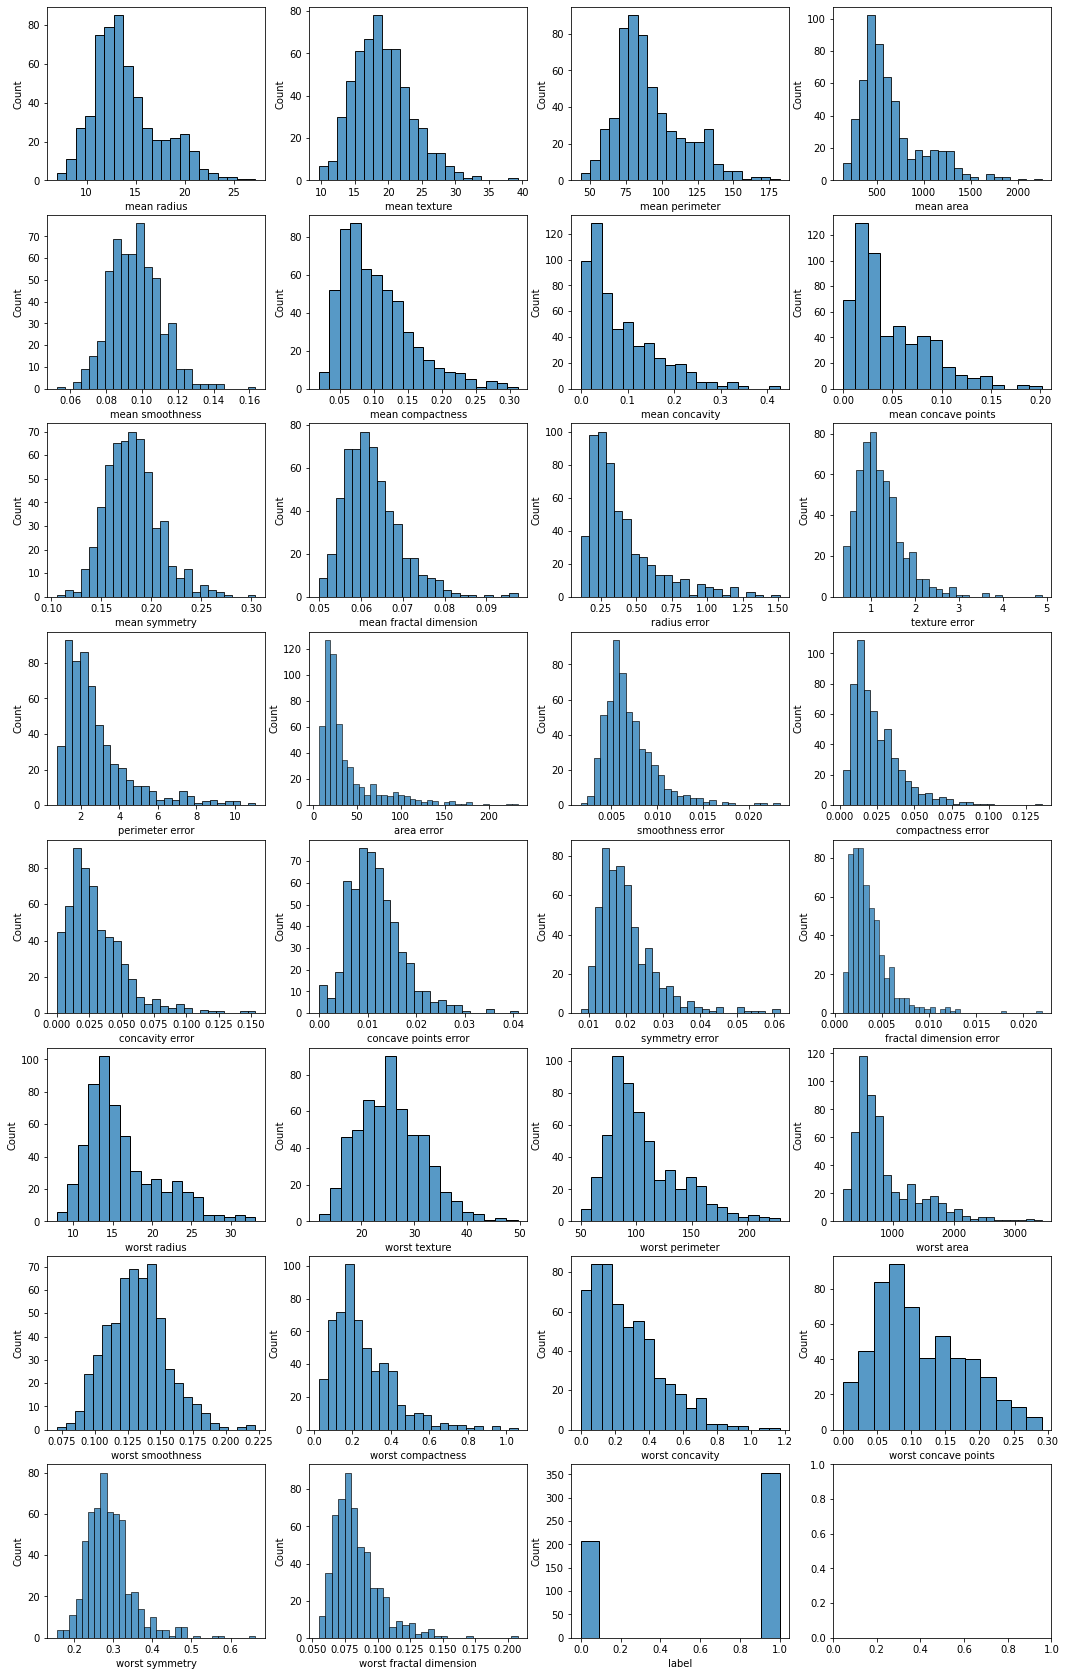

In [17]:
figure, axs_2d = plt.subplots(nrows=8, ncols=4)
figure.set_size_inches(18, 30)  # 그래프 크기를 조정

for x, ax in zip(df.columns, np.ravel(axs_2d)):
    sns.histplot(data=df, x=x, ax=ax)

전체적으로 편향되어서 티가 많이 안나지만,  
area error같은 경우는 600에 가깝던 범위가 300안으로 줄어들었다.

다음으로 각 feature과 label의 관계를 확인해보자.

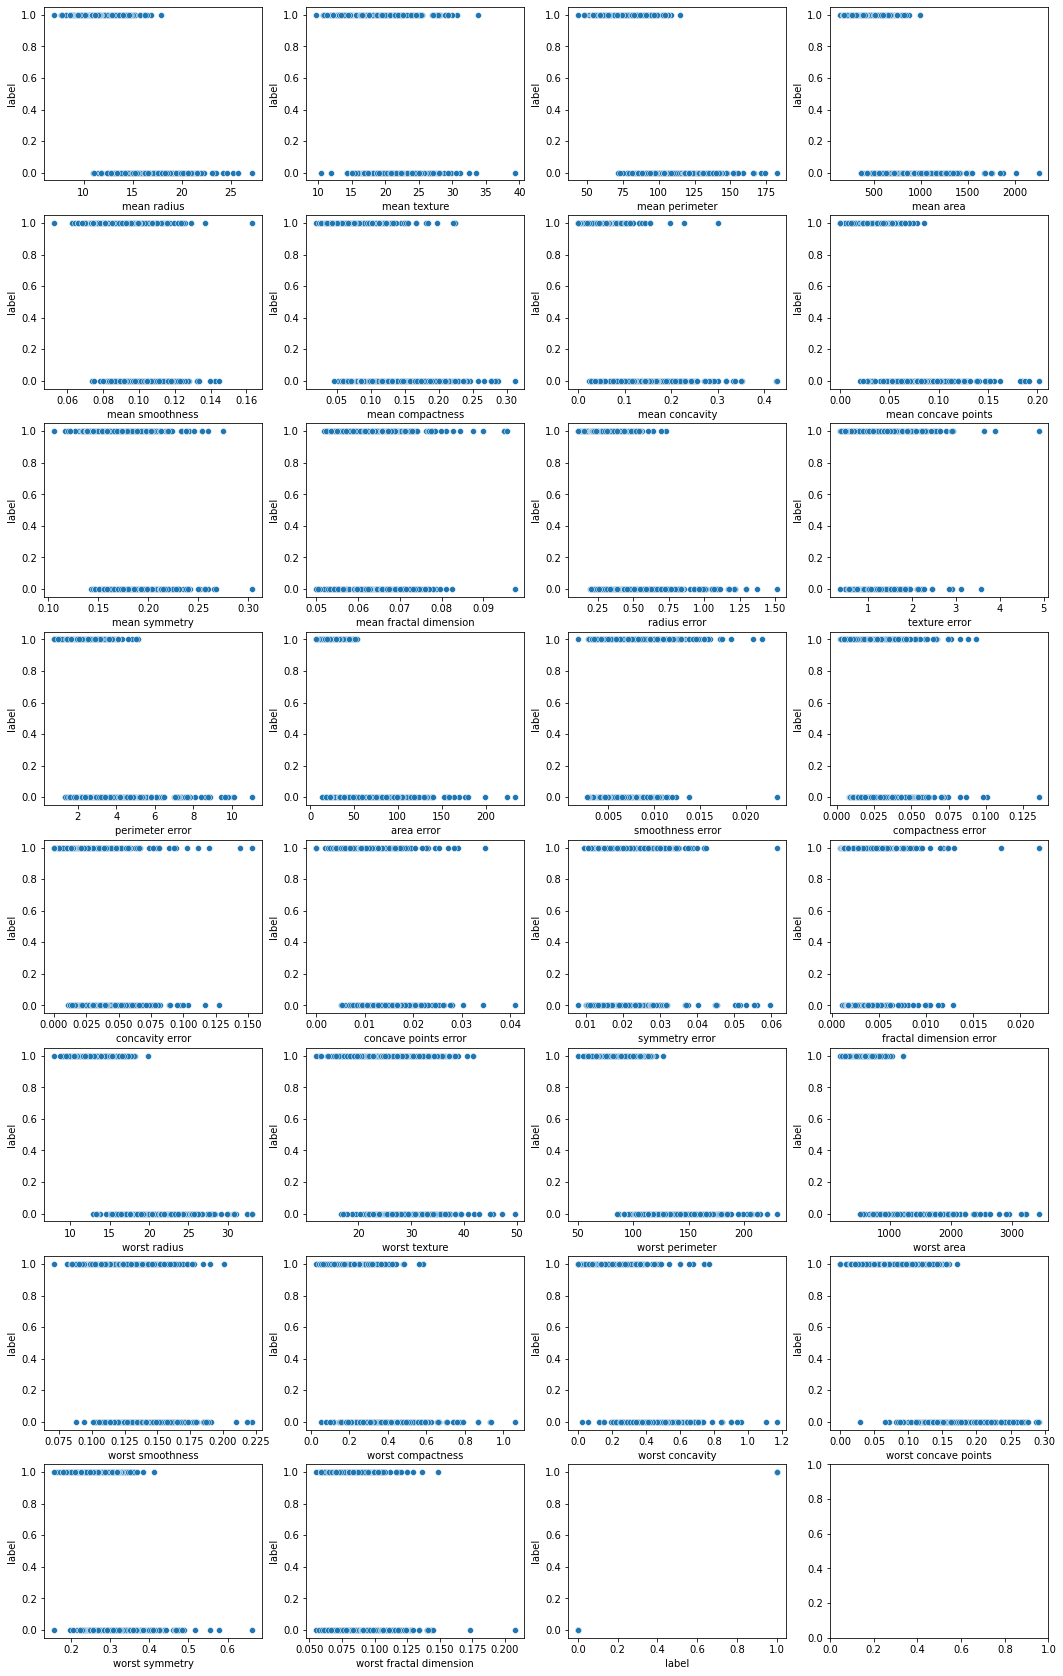

In [18]:
figure, axs_2d = plt.subplots(nrows=8, ncols=4)
figure.set_size_inches(18, 30)  # 그래프 크기를 조정

for x, ax in zip(df.columns, np.ravel(axs_2d)):
    sns.scatterplot(data=df, y='label', x=x, ax=ax)

악성, 양성의 라벨이 섞여 있으므로 라벨을 0, 1순이 되도록 정렬을해서 분포를 살펴보자.

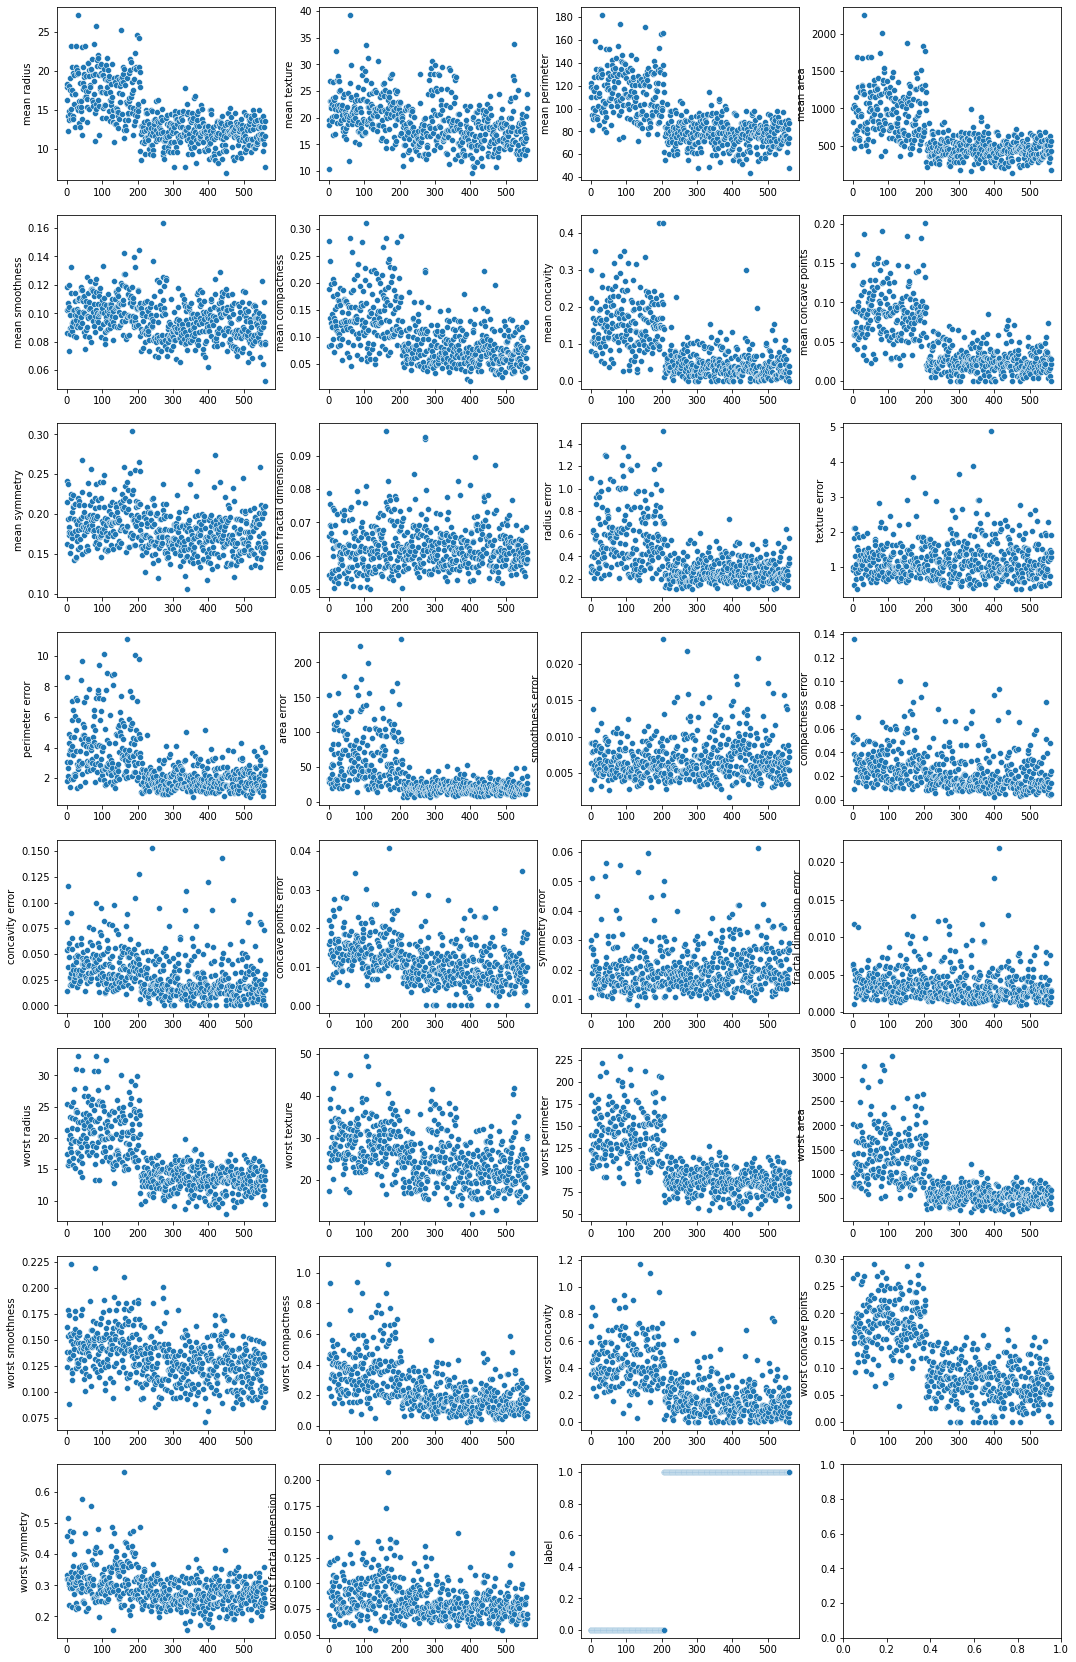

In [19]:
sorted_df = df.sort_values(by='label') # 라벨 값으로 정렬
sorted_df.index = range(len(df.index)) # 인덱스를 현재 정렬된 순서로 재설정

figure, axs_2d = plt.subplots(nrows=8, ncols=4)
figure.set_size_inches(18, 30)  # 그래프 크기를 조정

for x, ax in zip(sorted_df.columns, np.ravel(axs_2d)):
    sns.scatterplot(data = sorted_df[x], ax=ax)

worst concave points라는 값이 가장 label과의 분표과 유사하다.

mean fractal dimension처럼 관련성이 떨어져 보이는 값들도 있지만, 여러 특성들이  
라벨을 변경에 따른 분포 변화가 확인된다.

In [20]:
normalized_df = (df - df.mean())/df.std()
normalized_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,...,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02
mean,-3.148134e-15,-5.398608e-15,-1.441314e-15,-1.175809e-15,6.587060e-15,-8.723745e-16,-4.172226e-16,1.239025e-15,-2.617124e-15,5.373321e-16,...,2.180936e-15,-1.264311e-15,5.815830e-16,-5.499752e-15,-1.466601e-15,5.183675e-16,-1.517173e-16,-2.414834e-15,2.414834e-15,2.528622e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.071224e+00,-2.222580e+00,-2.027678e+00,-1.508372e+00,-3.105655e+00,-1.620998e+00,-1.135497e+00,-1.265227e+00,-2.786642e+00,-1.851643e+00,...,-2.219662e+00,-1.716958e+00,-1.251905e+00,-2.676965e+00,-1.438298e+00,-1.321968e+00,-1.738819e+00,-2.205471e+00,-1.605327e+00,-1.303417e+00
25%,-6.933791e-01,-7.205432e-01,-6.963407e-01,-6.809644e-01,-7.272717e-01,-7.608417e-01,-7.502859e-01,-7.329550e-01,-7.061850e-01,-7.226829e-01,...,-7.474785e-01,-6.918215e-01,-6.501523e-01,-6.904037e-01,-6.842063e-01,-7.643680e-01,-7.607863e-01,-6.517073e-01,-6.909654e-01,-1.303417e+00
50%,-2.213544e-01,-1.008951e-01,-2.314968e-01,-3.041768e-01,-3.101627e-02,-2.193472e-01,-3.459061e-01,-3.926737e-01,-6.232271e-02,-1.716517e-01,...,-4.264957e-02,-2.813868e-01,-3.419643e-01,-4.541638e-02,-2.643117e-01,-2.092358e-01,-2.332313e-01,-1.274513e-01,-2.147848e-01,7.658493e-01
75%,4.877769e-01,5.803691e-01,5.132715e-01,3.916322e-01,6.290816e-01,5.097547e-01,4.885430e-01,6.431302e-01,5.406004e-01,4.913304e-01,...,6.524352e-01,5.534704e-01,3.513106e-01,5.951982e-01,5.293353e-01,5.513410e-01,7.243006e-01,4.604259e-01,4.554314e-01,7.658493e-01
max,3.834994e+00,4.652841e+00,3.838433e+00,4.788359e+00,4.786309e+00,4.015330e+00,4.487219e+00,4.015497e+00,4.582418e+00,5.051513e+00,...,3.873698e+00,3.722765e+00,4.664576e+00,3.944759e+00,5.121605e+00,4.452690e+00,2.704875e+00,6.177666e+00,6.883243e+00,7.658493e-01


### Feature Data 지정하기
비교를 위해 정규화 전, 후 데이터 2개를 만든다.

In [21]:
x_data = df.drop('label', axis=1).values
x_data.shape

(562, 30)

In [22]:
x_data_nor = normalized_df.drop('label', axis=1).values
x_data_nor.shape

(562, 30)

### Label Data 지정하기

In [23]:
y_data = df['label'].values # label
y_data.shape

(562,)

총 데이터의 개수와 라벨의 분포를 알아보자.

In [24]:
y_data.shape

(562,)

총 데이터 개수 : 562
malignant의 개수 : 208
benign의 개수 : 354


<BarContainer object of 2 artists>

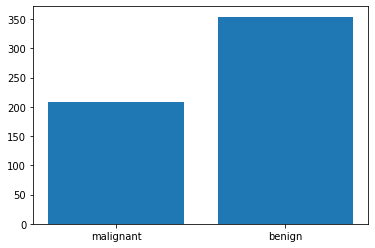

In [25]:
print(f"총 데이터 개수 : {len(y_data)}")

label_counts = []
for i, name in enumerate(breast_cancer.target_names):
    label_counts.append(np.count_nonzero(y_data == i))
    print(f"{name}의 개수 : {label_counts[i]}")
    
plt.bar(breast_cancer.target_names, label_counts)

총 데이터는 562개이고, 악성과 양성의 비율이 불균형하다.

## train, Test 데이터 분리

학습 데이터와 테스트 데이터로 분리한다.  
질병인 만큼 학습데이터가 중요한 것 같아서 10%를 테스터 데이터로 분리하였다.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=666)

In [27]:
x_train_nor, x_test_nor, y_train_nor, y_test_nor = train_test_split(x_data_nor, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=666)

In [28]:
x_train.shape

(505, 30)

In [29]:
x_test.shape

(57, 30)

같은 시드값을 사용했으니 두 y데이터는 동일해야 한다.

In [30]:
np.array_equal(y_train_nor, y_train)

True

## 다양한 모델로 학습시켜 보기

### Decision Tree 사용해 보기

In [31]:
model_decision_tree = DecisionTreeClassifier(random_state=1)
model_decision_tree.fit(x_train, y_train)
y_predict = model_decision_tree.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.89      0.94        38

    accuracy                           0.93        57
   macro avg       0.91      0.95      0.92        57
weighted avg       0.94      0.93      0.93        57



정확도 0.93

악성일 경우의 정밀도가 0.83  
양성일 경우의 재현율이 0.89

양성인데, 악성으로 판단한 경우가 좀 있지만,  
이런 암의 경우는 악성을 놓쳐서는 안된다.

즉, 악성의 재현율이 1.0이기 때문에 그렇게 나쁜 모델은 아닌 것 같다.

### Random Forest 사용해 보기

In [32]:
model_random_forest = RandomForestClassifier(random_state=2)
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.97      0.97      0.97        38

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



정확도 0.96

이전 이상치를 제거하지 않았을 경우 정확도가 0.89까지 떨어져서,  
의사결정모델보다 전체적인 결과가 좋지않았다.

이상치를 제거하자 전체적인 결과는 좋아졌지만,
악성의 재현율이 0.95이다.

즉, 이 모델은 의사결정모델보다 더 나쁜 모델이라고 할 수 있다.

정확도는 의사결저트리와 같이 나왔지만, 정밀도 부분이 다르다.

### SVM 사용해 보기

In [33]:
model_svm = svm.SVC(random_state=4)
model_svm.fit(x_train, y_train)
y_predict = model_svm.predict(x_test)

print("<정규화를 안한 경우>")
print(classification_report(y_test, y_predict))

<정규화를 안한 경우>
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.95      0.92      0.93        38

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.90        57
weighted avg       0.91      0.91      0.91        57



In [34]:
model_svm.fit(x_train_nor, y_train)
y_predict = model_svm.predict(x_test_nor)

print("<정규화를 한 경우>")
print(classification_report(y_test, y_predict))

<정규화를 한 경우>
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.97      1.00      0.99        38

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



정규화를 한 후 성능이 좋아졌다.

하지만 악성의 정밀도는 1.0이 되었지만, 재현율이 0.95로 떨어지는 모델이다.

### SGD Classifier 사용해 보기

In [35]:
model_sgd = SGDClassifier(random_state=8)
model_sgd.fit(x_train, y_train)
y_predict = model_sgd.predict(x_test)

print("<정규화를 안한 경우>")
print(classification_report(y_test, y_predict))

<정규화를 안한 경우>
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.97      0.95      0.96        38

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [36]:
model_sgd.fit(x_train_nor, y_train)
y_predict = model_sgd.predict(x_test_nor)

print("<정규화를 한 경우>")
print(classification_report(y_test, y_predict))

<정규화를 한 경우>
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.95      1.00      0.97        38

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



SGD는 정규화를 해서 정확도는 올랐지만,  
오히려 악성의 재현율이 0.95에서 0.89로 떨어져 버렸다.

### Logistic Regression 사용해 보기

In [37]:
model_logistic = LogisticRegression(max_iter=3000, random_state=16)
model_logistic.fit(x_train, y_train)
y_predict = model_logistic.predict(x_test)

print("<정규화를 안한 경우>")
print(classification_report(y_test, y_predict))

<정규화를 안한 경우>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        38

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [38]:
model_logistic.fit(x_train_nor, y_train)
y_predict = model_logistic.predict(x_test_nor)

print("<정규화를 한 경우>")
print(classification_report(y_test, y_predict))

<정규화를 한 경우>
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.97      1.00      0.99        38

    accuracy                           0.98        57
   macro avg       0.99      0.97      0.98        57
weighted avg       0.98      0.98      0.98        57



특이하게 logistic regression은 정규화를 하니깐 성능이 떨어져 버렸다.

정규화를 하기 전에는 완변학 분류를 해내었다.

## 모델을 평가해 보기

유방암을 판단 하는데 있어서 중요한 건 악성을 양성으로
판단하면 안된다는 것이다.

즉, 정확도 보다도 악성의 재현율이 높아야 한다는 것이다.

그런 의미에서는 의사결정트리나 정규화를 하지 않은 로지스틱 회귀 모델이
좋은 성능을 보여주었다.

이상치와 정규화등의 전처리에 따라 결과가 바뀌는데, 어떤건 도대체
왜 떨어지고, 왜 오르는지 알수 없는게 있었다.

좀 더 모델이 학습하는 방법과 구조들을 공부해야 겠다고 생각이 들었다.